In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import (
    VGG16, 
    preprocess_input, 
    decode_predictions
)

In [4]:
# Load the VGG16 model
# https://keras.io/api/applications/vgg/#vgg19-function
lake_model = VGG16(include_top=True, weights='imagenet')

553467904/553467096 [==============================] - 8s 0us/step


In [5]:
# Define default image size for VGG19
image_size = (224, 224)

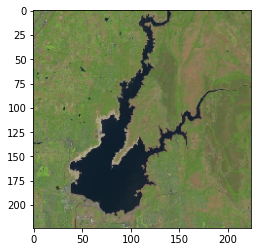

In [6]:
# Load the image and resize to default image size
folsomLake_testing_image_path = '/content/drive/MyDrive/FINAL PROJECT/Training Images/Folsom_Lake_Image_Crop62017.jpg'
fl_tr_img = image.load_img(folsomLake_testing_image_path, target_size=image_size)
plt.imshow(fl_tr_img)

In [7]:
# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(fl_tr_img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [8]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use VGG16 to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = lake_model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3))

40960/35363 [==================================] - 0s 0us/step
Predicted: [[('n02002724', 'black_stork', 0.051843148), ('n02169497', 'leaf_beetle', 0.048827533), ('n02018795', 'bustard', 0.03741938)]]


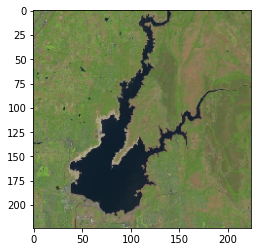

In [9]:
#Image Path
folsomLake_testing_image_path = '/content/drive/MyDrive/FINAL PROJECT/Training Images/Folsom_Lake_Image_Crop62017.jpg'
predict(folsomLake_testing_image_path)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

In [11]:
image_dir='/content/drive/MyDrive/FINAL PROJECT/Training Images/train/lakes'

In [12]:
os.listdir(image_dir)

['Copy of RandomLake6.jpg',
 'Copy of RandomLake1.jpg',
 'Copy of RandomLake5.jpg',
 'Copy of GoogleSatImageFolsomLake1.jpg',
 'Copy of RandomLake7.jpg',
 'Copy of RandomLake8.jpg',
 'Copy of RandomLake3.jpg',
 'Copy of RandomLake2.jpg',
 'Copy of RandomLake9.jpg',
 'Copy of RandomLake13.jpg',
 'Copy of RandomLake11.jpg',
 'Copy of RandomLake12.jpg',
 'Copy of RandomLake10.jpg']

In [13]:
!pip install mpimg

  Created wheel for mpimg: filename=mpimg-0.0.1-cp37-none-any.whl size=1342 sha256=ee9b6cbcd20ddee3d3a3beaa86dc65ed7d85d8d7db57fc803d371c510cce344d
  Stored in directory: /root/.cache/pip/wheels/ac/9a/83/6322b53076d0c38881052023b45df93497091de34cca6f6e4b
Successfully built mpimg


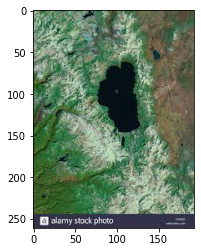

In [14]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(image_dir+'/Copy of RandomLake1.jpg'))

In [15]:
x1=image.img_to_array(image.load_img(image_dir+'/Copy of RandomLake1.jpg', target_size=image_size))
x1


array([[[149., 172., 144.],
        [137., 160., 132.],
        [137., 160., 132.],
        ...,
        [ 72.,  84.,  60.],
        [ 74.,  88.,  63.],
        [ 85.,  78.,  60.]],

       [[115., 138., 110.],
        [114., 137., 109.],
        [128., 151., 123.],
        ...,
        [ 72.,  84.,  60.],
        [ 73.,  87.,  62.],
        [ 85.,  82.,  63.]],

       [[117., 140., 112.],
        [133., 156., 128.],
        [162., 185., 157.],
        ...,
        [ 72.,  84.,  60.],
        [ 72.,  86.,  61.],
        [ 85.,  90.,  68.]],

       ...,

       [[ 50.,  51.,  71.],
        [ 50.,  51.,  71.],
        [ 50.,  51.,  71.],
        ...,
        [ 50.,  51.,  72.],
        [ 50.,  51.,  72.],
        [ 50.,  51.,  72.]],

       [[ 50.,  51.,  71.],
        [ 50.,  51.,  71.],
        [ 50.,  51.,  71.],
        ...,
        [ 50.,  51.,  72.],
        [ 50.,  51.,  72.],
        [ 50.,  51.,  72.]],

       [[ 50.,  51.,  71.],
        [ 50.,  51.,  71.],
        [ 50.,  

In [16]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/content/drive/MyDrive/FINAL PROJECT/Training Images/train_comprehensive/lakes/RandomLake1.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/FINAL PROJECT/Training Images/preview', save_prefix='lake', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

def cnn_model():
    input_layer = tf.keras.layers.Input(shape=(150, 150, 3), name="input_layer")
    use_bias = True

    # Conv1
    conv = tf.keras.layers.Conv2D(32,
                                  kernel_size=(3, 3),
                                  padding='same',
                                  use_bias=use_bias,
                                  activation=None)(input_layer)
    bn = tf.keras.layers.BatchNormalization(epsilon=1e-06, axis=-1, momentum=0.9)(conv)
    activation = tf.keras.layers.Activation(tf.nn.relu)(bn)

    # Conv2
    conv = tf.keras.layers.Conv2D(32,
                                  kernel_size=(3, 3),
                                  padding='same',
                                  use_bias=use_bias,
                                  activation=None)(activation)
    bn = tf.keras.layers.BatchNormalization(epsilon=1e-06, axis=-1, momentum=0.9)(conv)
    activation = tf.keras.layers.Activation(tf.nn.relu)(bn)

    # MaxPooling1
    max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(activation)
    dropout = tf.keras.layers.Dropout(0.2)(max_pool)

    # Conv3
    conv = tf.keras.layers.Conv2D(64,
                                  kernel_size=(3, 3),
                                  padding='same',
                                  use_bias=use_bias,
                                  activation=None)(dropout)
    bn = tf.keras.layers.BatchNormalization(epsilon=1e-06, axis=-1, momentum=0.9)(conv)
    activation = tf.keras.layers.Activation(tf.nn.relu)(bn)

    # Conv4
    conv = tf.keras.layers.Conv2D(64,
                                  kernel_size=(3, 3),
                                  padding='same',
                                  use_bias=use_bias,
                                  activation=None)(activation)
    bn = tf.keras.layers.BatchNormalization(epsilon=1e-06, axis=-1, momentum=0.9)(conv)
    activation = tf.keras.layers.Activation(tf.nn.relu)(bn)

    # MaxPooling2
    max_pool = tf.keras.layers.MaxPooling2D()(activation)
    dropout = tf.keras.layers.Dropout(0.3)(max_pool)

    # Conv5
    conv = tf.keras.layers.Conv2D(128,
                                  kernel_size=(3, 3),
                                  padding='same',
                                  use_bias=use_bias,
                                  activation=None)(dropout)
    bn = tf.keras.layers.BatchNormalization(epsilon=1e-06, axis=-1, momentum=0.9)(conv)
    activation = tf.keras.layers.Activation(tf.nn.relu)(bn)
    # Conv6
    conv = tf.keras.layers.Conv2D(128,
                                  kernel_size=(3, 3),
                                  padding='same',
                                  use_bias=use_bias,
                                  activation=None)(activation)
    bn = tf.keras.layers.BatchNormalization(epsilon=1e-06, axis=-1, momentum=0.9)(conv)
    activation = tf.keras.layers.Activation(tf.nn.relu)(bn)

    # MaxPooling3
    max_pool = tf.keras.layers.MaxPooling2D()(activation)
    dropout = tf.keras.layers.Dropout(0.4)(max_pool)

    # Dense Layer
    flatten = tf.keras.layers.Flatten()(dropout)

    # Softmax Layer
    output = tf.keras.layers.Dense(10, activation=tf.nn.softmax, name='output')(flatten)

    return tf.keras.Model(inputs=input_layer, outputs=output)

In [18]:

cnn=cnn_model()
cnn.summary()
cnn.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 32)      0     

In [33]:
batch_size = 8

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'Training Images/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/FINAL PROJECT/Training Images/train_comprehensive',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/FINAL PROJECT/Training Images/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 196 images belonging to 6 classes.
Found 0 images belonging to 0 classes.


In [34]:
cnn.fit_generator(
        train_generator,
        steps_per_epoch=13 // batch_size,
        epochs=50)
#        validation_data=validation_generator,
#        validation_steps=800 // batch_size)
cnn.save_weights('first_try.h5')  # always save your weights after training or during training

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
1/1 [==============================] - 7s 7s/step - loss: 52.4997 - accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 8s 8s/step - loss: 40.1422 - accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 8s 8s/step - loss: 47.8657 - accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 4s 4s/step - loss: 41.6869 - accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 8s 8s/step - loss: 40.1422 - accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 4s 4s/step - loss: 47.8657 - accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 5s 5s/step - loss: 37.0528 - accuracy: 0.0000e+00
Epoch 8/50
1/1 [==============================] - 3s 3s/step - loss: 43.2316 - accuracy: 0.0000e+00
Epoch 9/50
1/1 [==============================] - 2s 2s/step - loss: 43.2316 - accuracy: 0.0000e+00
Epoch 10/50
1/1 [==============================] - 5s 5s/step - loss: 43.2316 - accuracy: 0.0000e+00

In [ ]:

cnn.fit_generator(
        train_generator,
#         steps_per_epoch=200 // batch_size,
        steps_per_epoch=2000 // batch_size,
        epochs=50)
cnn.save_weights('first_try.h5')  # always save your weights after training or during training

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2000/2000 [==============================] - 3s 1ms/step - loss: 1.5249 - accuracy: 0.0000e+00


**Fine-tuning with ResNet**

In [ ]:
#Fine-tuning ResNet with Keras, TensorFlow, and Deep Learning
>>> baseModel = ResNet50(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

In [ ]:
baseModel.summary()

In [ ]:

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(config.CLASSES), activation="softmax")(headModel)

**Open up the config.py file and insert the following code:**

In [ ]:
# import the necessary packages
import os
# initialize the path to the *original* input directory of images
ORIG_INPUT_DATASET = "8k_normal_vs_camouflage_clothes_images"
# initialize the base path to the *new* directory that will contain
# our images after computing the training and testing split
BASE_PATH = "camo_not_camo"
# derive the training, validation, and testing directories
TRAIN_PATH = os.path.sep.join([BASE_PATH, "training"])
VAL_PATH = os.path.sep.join([BASE_PATH, "validation"])
TEST_PATH = os.path.sep.join([BASE_PATH, "testing"])

**Python driver scripts:**

1.   build_dataset.py (Splits our data into training, testing, and validation subdirectories)
2.   train_camo_detector.py (Trains a camouflage classifier with Python, TensorFlow/Keras, and fine-tuning)


In [ ]:
# import the necessary packages
import os
# initialize the path to the *original* input directory of images
ORIG_INPUT_DATASET = "General Lake Satellite Image Training Dataset"
# initialize the base path to the *new* directory that will contain
# our images after computing the training and testing split
BASE_PATH = "lake_not_lake"
# derive the training, validation, and testing directories
TRAIN_PATH = os.path.sep.join([BASE_PATH, "training"])
VAL_PATH = os.path.sep.join([BASE_PATH, "validation"])
TEST_PATH = os.path.sep.join([BASE_PATH, "testing"])

In [ ]:
# define the amount of data that will be used training
TRAIN_SPLIT = 0.75
# the amount of validation data will be a percentage of the
# *training* data
VAL_SPLIT = 0.1
# define the names of the classes
CLASSES = ["Lake", "Mouintain", "Sea", "River", "Forest"]

**Hyperparameters and Output model path**


In [ ]:
# initialize the initial learning rate, batch size, and number of
# epochs to train for
INIT_LR = 1e-4
BS = 32
NUM_EPOCHS = 20
# define the path to the serialized output model after training
MODEL_PATH = "lake_detector.model"

**Implementing our Lake dataset builder script**

In [ ]:
# import the necessary packages
from pyimagesearch import config
from imutils import paths
import random
import shutil
import os

In [ ]:
# grab the paths to all input images in the original input directory
# and shuffle them
imagePaths = list(paths.list_images(config.ORIG_INPUT_DATASET))
random.seed(42)
random.shuffle(imagePaths)
# compute the training and testing split
i = int(len(imagePaths) * config.TRAIN_SPLIT)
trainPaths = imagePaths[:i]
testPaths = imagePaths[i:]
# we'll be using part of the training data for validation
i = int(len(trainPaths) * config.VAL_SPLIT)
valPaths = trainPaths[:i]
trainPaths = trainPaths[i:]
# define the datasets that we'll be building
datasets = [
	("training", trainPaths, config.TRAIN_PATH),
	("validation", valPaths, config.VAL_PATH),
	("testing", testPaths, config.TEST_PATH)
]

In [ ]:
# loop over the datasets
for (dType, imagePaths, baseOutput) in datasets:
	# show which data split we are creating
	print("[INFO] building '{}' split".format(dType))
	# if the output base output directory does not exist, create it
	if not os.path.exists(baseOutput):
		print("[INFO] 'creating {}' directory".format(baseOutput))
		os.makedirs(baseOutput)
	# loop over the input image paths
	for inputPath in imagePaths:
		# extract the filename of the input image along with its
		# corresponding class label
		filename = inputPath.split(os.path.sep)[-1]
		label = inputPath.split(os.path.sep)[-2]
		# build the path to the label directory
		labelPath = os.path.sep.join([baseOutput, label])
		# if the label output directory does not exist, create it
		if not os.path.exists(labelPath):
			print("[INFO] 'creating {}' directory".format(labelPath))
			os.makedirs(labelPath)
		# construct the path to the destination image and then copy
		# the image itself
		p = os.path.sep.join([labelPath, filename])
		shutil.copy2(inputPath, p)

**Building the Lake image dataset**

**Implementing our ResNet fine-tuning script with Keras and TensorFlow**
Open the train_lake_detector.py file

In [ ]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")
# import the necessary packages
from pyimagesearch import config
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [ ]:
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-p", "--plot", type=str, default="plot.png",
	help="path to output loss/accuracy plot")
args = vars(ap.parse_args())
# determine the total number of image paths in training, validation,
# and testing directories
totalTrain = len(list(paths.list_images(config.TRAIN_PATH)))
totalVal = len(list(paths.list_images(config.VAL_PATH)))
totalTest = len(list(paths.list_images(config.TEST_PATH)))

**Data Augmentation**

In [ ]:
# initialize the training training data augmentation object
trainAug = ImageDataGenerator(
	rotation_range=25,
	zoom_range=0.1,
	width_shift_range=0.1,
	height_shift_range=0.1,
	shear_range=0.2,
	horizontal_flip=True,
	fill_mode="nearest")
# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug = ImageDataGenerator()
# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation
# objects
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug.mean = mean
valAug.mean = mean

 **Instantiate three Python generators from the data augmentation objects:**

In [ ]:
# initialize the training generator
trainGen = trainAug.flow_from_directory(
	config.TRAIN_PATH,
	class_mode="categorical",
	target_size=(224, 224),
	color_mode="rgb",
	shuffle=True,
	batch_size=config.BS)
# initialize the validation generator
valGen = valAug.flow_from_directory(
	config.VAL_PATH,
	class_mode="categorical",
	target_size=(224, 224),
	color_mode="rgb",
	shuffle=False,
	batch_size=config.BS)
# initialize the testing generator
testGen = valAug.flow_from_directory(
	config.TEST_PATH,
	class_mode="categorical",
	target_size=(224, 224),
	color_mode="rgb",
	shuffle=False,
	batch_size=config.BS)

**Load the ResNet50 classification model and prepare it for fine-tuning:**
<br>
Construct a new FC headModel and append it to the baseModel.

(We only want to train the head of the network.)


In [ ]:
# load the ResNet-50 network, ensuring the head FC layer sets are left
# off
print("[INFO] preparing model...")
baseModel = ResNet50(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(config.CLASSES), activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the training process
for layer in baseModel.layers:
	layer.trainable = False

**Fine-tune our ResNet-based lake detector with TensorFlow, Keras, and deep learning:**

In [ ]:
# compile the model
opt = Adam(lr=config.INIT_LR, decay=config.INIT_LR / config.NUM_EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the model
print("[INFO] training model...")
H = model.fit_generator(
	trainGen,
	steps_per_epoch=totalTrain // config.BS,
	validation_data=valGen,
	validation_steps=totalVal // config.BS,
	epochs=config.NUM_EPOCHS)

**Evaluate our model on the testing set:**

In [ ]:
# reset the testing generator and then use our trained model to
# make predictions on the data
print("[INFO] evaluating network...")
testGen.reset()
predIdxs = model.predict_generator(testGen,
	steps=(totalTest // config.BS) + 1)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testGen.classes, predIdxs,
	target_names=testGen.class_indices.keys()))
# serialize the model to disk
print("[INFO] saving model...")
model.save(config.MODEL_PATH, save_format="h5")

**Plot the training accuracy/loss history via matplotlib:**
(Saves generated plot to disk)

In [ ]:
# plot the training loss and accuracy
N = config.NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])

**Fine-tuning ResNet with Keras and TensorFlow results**
(Run the train_lake_detector.py script)